In [1012]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
import torch
from torch import nn

In [1013]:
df_zoo = pd.read_csv('zootest.csv')
class_data = pd.read_csv('name_fix.csv')

In [1014]:
df_zoo.head()

,animal_name,hair_boolean,feathers_boolean,eggs_boolean,milk_boolean,airborne_boolean,aquatic_boolean,predator_boolean,toothed_boolean,backbone_boolean,breathes_boolean,venomous_boolean,fins_boolean,legs_numeric,tail_boolean,domestic_boolean,catsize_boolean,type_numeric
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [1015]:
# devuelve el tamaño del conjunto de datos (filas x columnas)
df_zoo.shape

(101, 18)

In [1016]:
# trae información sobre el conjunto de datos, como el nombre de
# cada columna y sus respectivos tipos, p.e.
df_zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   animal_name       101 non-null    object
 1   hair_boolean      101 non-null    int64 
 2   feathers_boolean  101 non-null    int64 
 3   eggs_boolean      101 non-null    int64 
 4   milk_boolean      101 non-null    int64 
 5   airborne_boolean  101 non-null    int64 
 6   aquatic_boolean   101 non-null    int64 
 7   predator_boolean  101 non-null    int64 
 8   toothed_boolean   101 non-null    int64 
 9   backbone_boolean  101 non-null    int64 
 10  breathes_boolean  101 non-null    int64 
 11  venomous_boolean  101 non-null    int64 
 12  fins_boolean      101 non-null    int64 
 13  legs_numeric      101 non-null    int64 
 14  tail_boolean      101 non-null    int64 
 15  domestic_boolean  101 non-null    int64 
 16  catsize_boolean   101 non-null    int64 
 17  type_numeric    

In [1017]:
# devolver tantos tipos de valores diferentes existen en cada columna
df_zoo.nunique()

animal_name         100
hair_boolean          2
feathers_boolean      2
eggs_boolean          2
milk_boolean          2
airborne_boolean      2
aquatic_boolean       2
predator_boolean      2
toothed_boolean       2
backbone_boolean      2
breathes_boolean      2
venomous_boolean      2
fins_boolean          2
legs_numeric          6
tail_boolean          2
domestic_boolean      2
catsize_boolean       2
type_numeric          7
dtype: int64

In [1018]:
# comprueba si faltan datos y devuelve el importe
# presente en cada columna
df_zoo.isnull().sum()

animal_name         0
hair_boolean        0
feathers_boolean    0
eggs_boolean        0
milk_boolean        0
airborne_boolean    0
aquatic_boolean     0
predator_boolean    0
toothed_boolean     0
backbone_boolean    0
breathes_boolean    0
venomous_boolean    0
fins_boolean        0
legs_numeric        0
tail_boolean        0
domestic_boolean    0
catsize_boolean     0
type_numeric        0
dtype: int64

In [1019]:
# Visualizacion de datos
# crea una copia del conjunto de datos y la almacena en una variable
df_zoo_renamed = df_zoo


In [1020]:
# crear un diccionario para cambiar el nombre de los valores de las columnas
# 'type_numeric'
remap = {
    1 : 'Mammal',
    2 : 'Bird',
    3 : 'Reptile',
    4 : 'Fish Count',
    5 : 'Amphibian',
    6 : 'Bug',
    7 : 'Invertebrate'
}

# hacer una copia del marco de datos original, cambiar el nombre de los valores
# usando remap y genera un nuevo marco de datos
df_zoo_renamed = df_zoo.copy()
df_zoo_renamed['type_numeric'] = df_zoo_renamed['type_numeric'].replace(remap)

In [1021]:
# devuelve los valores de la columna 'class_type' y cuenta el
# número de valores únicos
df_zoo_renamed['type_numeric'].value_counts()

type_numeric
Mammal          41
Bird            20
Fish Count      13
Invertebrate    10
Bug              8
Reptile          5
Amphibian        4
Name: count, dtype: int64

In [1022]:
df_zoo.head()

,animal_name,hair_boolean,feathers_boolean,eggs_boolean,milk_boolean,airborne_boolean,aquatic_boolean,predator_boolean,toothed_boolean,backbone_boolean,breathes_boolean,venomous_boolean,fins_boolean,legs_numeric,tail_boolean,domestic_boolean,catsize_boolean,type_numeric
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [1023]:
# utiliza la biblioteca plotly express para generar un gráfico del
# columna 'type_numeric' que muestra la cantidad de cada tipo
# de animales
fig = px.histogram(df_zoo_renamed, x = 'type_numeric')
fig.update_layout(bargap = 0.2, width = 600, height = 400)
fig.show()

In [1024]:
# cuenta los valores únicos presentes en la columna
# 'type_numeric', los almacena junto con los datos de la columna
# en un nuevo marco de datos y cambiar el nombre de las columnas
count_class_type = df_zoo_renamed['type_numeric'].value_counts().reset_index()
count_class_type.columns = ['type_numeric', 'contagem']
count_class_type

,type_numeric,contagem
0,Mammal,41
1,Bird,20
2,Fish Count,13
3,Invertebrate,10
4,Bug,8
5,Reptile,5
6,Amphibian,4


In [1025]:
# generar un gráfico circular usando el marco de datos generado arriba
# también clasificando animales por sus respectivos tipos
fig = px.pie(count_class_type, names='type_numeric', values='contagem')
fig.update_layout(width = 600, height = 400)
fig.show()

In [1026]:
# eliminamos las columnas 'animal_name' y 'type_numeric' ya que son iguales
# no tendrá valor para el gráfico generado a continuación
df_zoo_drop = df_zoo.drop(['animal_name', 'type_numeric'], axis = 1)

In [1027]:
# generar una matriz de correlación entre las columnas del marco de datos
matriz_zoo = df_zoo_drop.corr()

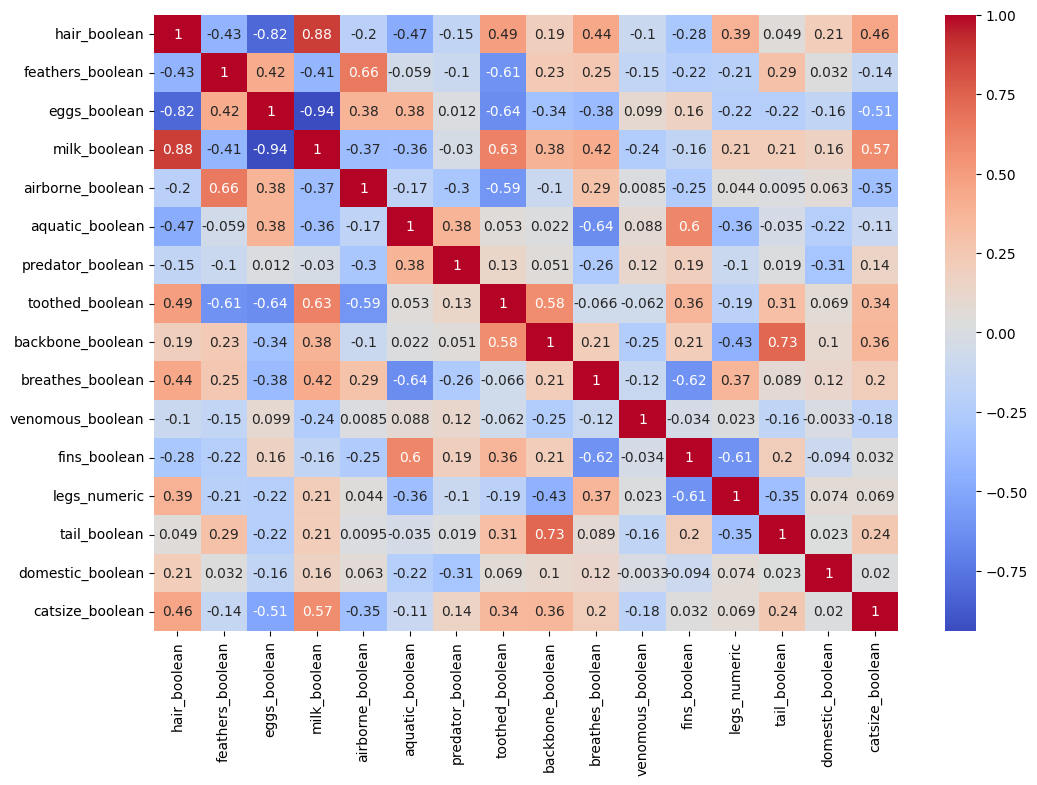

In [1028]:
# generar un gráfico de correlación usando la matriz anterior para
# relacionar todas las columnas del marco de datos entre sí, donde el
# el coeficiente 1 indica relación total y -1 ninguna relación
plt.figure(figsize = (12, 8))
sns.heatmap(matriz_zoo, annot = True, cmap = 'coolwarm')
plt.show()

In [1029]:
# Preprocesamiento de datos
# eliminando las columnas 'animal_name' y 'tipo_clase' y almacenando
# en la variable X que se utilizará como datos de prueba más adelante
X = df_zoo.drop(['animal_name', 'type_numeric'], axis = 1)

In [1030]:
X.head(3)

,hair_boolean,feathers_boolean,eggs_boolean,milk_boolean,airborne_boolean,aquatic_boolean,predator_boolean,toothed_boolean,backbone_boolean,breathes_boolean,venomous_boolean,fins_boolean,legs_numeric,tail_boolean,domestic_boolean,catsize_boolean
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [1031]:
# crear un nuevo marco de datos con solo la columna 'type_numeric'
df_zoo_binario = df_zoo['type_numeric']

In [1032]:
# cambia el nombre de todos los valores en la columna 'type_numeric' a
# para sus respectivos tipos
df_zoo_binario = df_zoo_binario.replace(1, 'Mammal')
df_zoo_binario = df_zoo_binario.replace(2, 'Bird')
df_zoo_binario = df_zoo_binario.replace(3, 'Reptile')
df_zoo_binario = df_zoo_binario.replace(4, 'Fish')
df_zoo_binario = df_zoo_binario.replace(5, 'Amphibian')
df_zoo_binario = df_zoo_binario.replace(6, 'Bug')
df_zoo_binario = df_zoo_binario.replace(7, 'Invertebrate')

In [1033]:
# marco de datos que clasifica animales solo en mamíferos
# y no mamíferos
df_zoo_binario.value_counts()

type_numeric
Mammal          41
Bird            20
Fish            13
Invertebrate    10
Bug              8
Reptile          5
Amphibian        4
Name: count, dtype: int64

In [1034]:
# asignar el marco de datos df_zoo_binario como valor y
y = df_zoo_binario

In [1035]:
# Machine Lerning
# KNN

In [1036]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=2,stratify=y)

Mejor precisión del entrenamiento:-  1.0
Mejor precisión de prueba:-  1.0


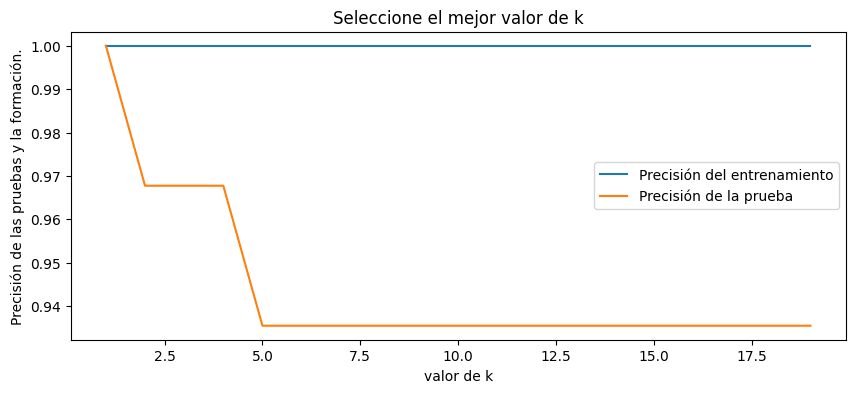

In [1037]:
# Construyendo modal usando KNN
k = range(1,20)
trainingAccuracy = []
testAccuracy=[]
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=15,p=1,weights='distance')
    knn.fit(x_train,y_train)
    trainingacc = knn.score(x_train,y_train)
    trainingAccuracy.append(trainingacc)
    testAccuracy.append(knn.score(x_test,y_test))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
plt.xlabel("valor de k")
plt.ylabel("Precisión de las pruebas y la formación.")
plt.title("Seleccione el mejor valor de k")
plt.plot(k,trainingAccuracy)
plt.plot(k,testAccuracy)
axes.legend(["Precisión del entrenamiento","Precisión de la prueba"])
print("Mejor precisión del entrenamiento:- ", max(trainingAccuracy)) 
print("Mejor precisión de prueba:- ", max(testAccuracy))

In [1038]:
# Descubriendo los mejores parámetros de hiperajuste de KNN
k_range = list(range(1,50))
weight_options = ["uniform", "distance"]
pe=[1,2]

param_grid = dict(n_neighbors = k_range, weights = weight_options,p=pe)
knn = KNeighborsClassifier()

knngrid = GridSearchCV(knn, param_grid, cv = 3, scoring = 'accuracy',n_jobs=15)
knngrid.fit(x_train,y_train)

print("Mejor puntuación en división de 3 pliegues Datos en división de entrenamiento: -", knngrid.best_score_)
print("Mejor parámetro:", knngrid.best_params_)
print("Mejor métrica KNN:", knngrid.best_estimator_)

print(f'Precisión del entrenamiento {knngrid.score(x_train, y_train)}')
print(f'Precisión de la prueba {knngrid.score(x_test, y_test)}')


Mejor puntuación en división de 3 pliegues Datos en división de entrenamiento: - 0.9432367149758454
Mejor parámetro: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
Mejor métrica KNN: KNeighborsClassifier(n_neighbors=4, weights='distance')
Precisión del entrenamiento 1.0
Precisión de la prueba 0.9354838709677419


c:\Users\diego\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning:

One or more of the test scores are non-finite: [0.9281401  0.9281401  0.94263285 0.94263285 0.90036232 0.9281401
 0.90036232 0.94263285 0.91485507 0.92874396 0.90036232 0.92874396
 0.87258454 0.92874396 0.85809179 0.94323671 0.85809179 0.94323671
 0.85809179 0.92934783 0.82910628 0.92874396 0.78623188 0.88647343
 0.82910628 0.91485507 0.80072464 0.82910628 0.81521739 0.90036232
 0.80072464 0.82910628 0.80072464 0.89975845 0.80072464 0.82910628
 0.80072464 0.89975845 0.80072464 0.82910628 0.80072464 0.88586957
 0.80072464 0.82910628 0.80072464 0.88586957 0.78623188 0.82910628
 0.80072464 0.88586957 0.80072464 0.82910628 0.81461353 0.87137681
 0.74396135 0.82910628 0.81461353 0.87137681 0.70108696 0.82910628
 0.81461353 0.87137681 0.64432367 0.82910628 0.75785024 0.85748792
 0.62983092 0.82910628 0.7294686  0.87137681 0.60084541 0.82910628
 0.64371981 0.87137681 

In [1039]:
# Usando el modal de regresión logística
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)

log_model.fit(x_train, y_train)

print(f' Precisión del entrenamiento {log_model.score(x_train,y_train)}')
f'Precisión de la prueba {log_model.score(x_test,y_test)}'

 Precisión del entrenamiento 1.0


'Precisión de la prueba 0.967741935483871'

In [1040]:
# Usando Neural Network

In [1041]:
# Elegir el mejor parámetro usando CV de búsqueda de cuadrícula
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=4)
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],            
        }]

clf = GridSearchCV(MLPClassifier(), param_grid, cv=folds,
scoring='accuracy',n_jobs=-1,verbose = 1,)
clf.fit(x_train, y_train)

print(f' Precisión del entrenamiento {clf.score(x_train,y_train)}')
f'Precisión de la prueba {clf.score(x_test,y_test)}'

Fitting 3 folds for each of 12 candidates, totalling 36 fits
 Precisión del entrenamiento 1.0


'Precisión de la prueba 1.0'

In [1042]:
cv_results = pd.DataFrame(clf.cv_results_)

#imprimir el valor óptimo de los hiperparámetros
print('Mejores hiperparámetros: ', clf.best_params_)
print ("Mejor estimador: ", clf.best_estimator_)



Mejores hiperparámetros:  {'activation': 'logistic', 'solver': 'lbfgs'}
Mejor estimador:  MLPClassifier(activation='logistic', solver='lbfgs')
